In [40]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from InputProcessor import process_input
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


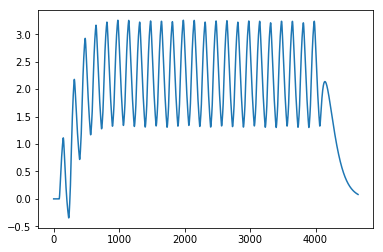

In [27]:
t,pos_out, avdu_out = process_input(800)
plt.plot(avdu_out[1,:])

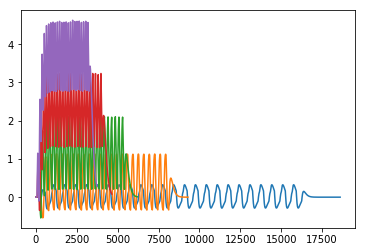

In [29]:
for i in range(5):
    t,pos_out, avdu_out = process_input((i+1)*200)
    plt.plot(avdu_out[1,:])

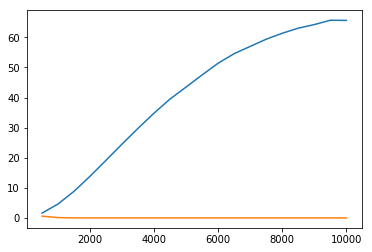

In [30]:
xx = np.zeros(20)
yy = np.zeros(20)
x=[]
for i in range(20) :
    t,pos_out, avdu_out = process_input((i+1)*500)
    xx[i] = np.max(avdu_out[1,])
    yy[i] = np.max(avdu_out[0,])
    x.append((i+1)*500)

plt.plot(x,xx)
plt.plot(x,yy)

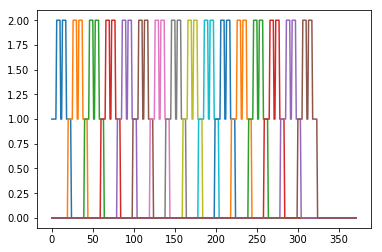

In [31]:
for i in range(16):
    plt.plot(pos_out[i,:])

In [41]:
def create_input_file(file_name, dt=1e-4, angular_velocity = 500):
    """
    Create input stimulus for sensory neurons in artificial LPU.
    Creates an HDF5 file containing input signals for the specified number of
    neurons. The signals consist of a rectangular pulse of specified duration
    and magnitude.
    Parameters
    ----------
    file_name : str
        Name of output HDF5 file.
    dt : float
        Time resolution of generated signal.
    """
    t, pos_out, avdu_out = process_input(800)
    inp = np.transpose(np.concatenate((avdu_out,pos_out)))

    
    N_driver = 2
    N_ring = 16
    
    uids = ["driver_" + str(i) for i in range(N_driver)]
    uids.extend(["pos_" + str(i) for i in range(N_ring)])
    uids = np.array(uids, dtype = 'S')


    with h5py.File(file_name, 'w') as f:
        f.create_dataset('I/uids', data=uids)
        f.create_dataset('I/data', (len(t),N_driver+N_ring),
                         dtype=np.float64,
                         data=inp)
        f.close()
        
create_input_file("input.h5")

In [26]:
#Extra function used for testing RotN
# import numpy as np
# import h5py
# uids = ["ring0","driver0"]
# uids = np.array(uids, dtype = 'S')
# data = np.zeros((10000,2))
# data[2000:9000,0] = 6.0
# data[1000:8000,1] = 2.0
# f.close()
# with h5py.File("test.h5", 'w') as f:
#         f.create_dataset('I/uids', data=uids)
#         f.create_dataset('I/data', (10000,2),
#                          dtype=np.float64,
#                          data=data)

# f = h5py.File('test.h5', 'r')
# print(f['I']['data'])
# f.close()

<HDF5 dataset "data": shape (10000, 2), type "<f8">


0.39316976968510187
0.39316976968510187


C:\Users\prane\Anaconda3\envs\speech\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


1.0484527191602715
0.39316976968510187
0.39316976968510187


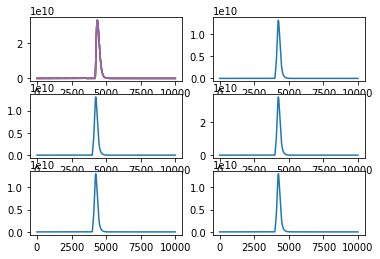

In [117]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File('output.h5', 'r')

for i in range(5):
    var = 'V'
    node = bytes('ring_'+str(0), encoding='utf-8')
    idx = [a for a in f[var]['uids']].index(node)
    #print([a for a in f[var]['uids']])
    plt.subplot(3,2,1)
    plt.plot(np.transpose(f[var]['data'])[idx])
    x=np.max(np.transpose(f[var]['data'])[idx])
    plt.subplot(3,2,i+2)
    var = 'I'
    node = bytes('Exc_r_3->'+str(i+1), encoding='utf-8')
    idx = [a for a in f[var]['uids']].index(node)
    plt.plot(np.transpose(f[var]['data'])[idx])
    print(np.max(np.transpose(f[var]['data'])[idx])/x)
    


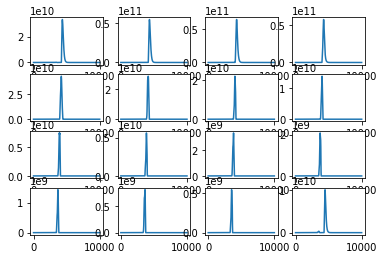

In [112]:
for i in range(16):
    var = 'V'
    node = bytes('ring_'+str(i), encoding='utf-8')
    idx = [a for a in f[var]['uids']].index(node)
    plt.subplot(4,4,i+1)
    plt.plot(np.transpose(f[var]['data'])[idx])

In [113]:
f.close()